# Data Visualization & Exploration

## Goals

This program aims to:
- Explore the relationships between the traits with the price individually
- Explore the statistical aspects of our data from the dataset
- Choose the meaningful features from the dataset
- Try to visualize the datapoints

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
from matplotlib import animation

In [2]:
# import the cleaned data file

df = pd.read_csv("data_cleaned.csv")

df.head(5)

,city,date_count,postal_code,room,price
0,Helsinki,1,100,1,5458
1,Helsinki,1,100,2,5164
2,Helsinki,1,100,3,4944
3,Helsinki,1,120,1,5515
4,Helsinki,1,120,2,5349


In [3]:
# From the dataframe selet specific properties as features and label
# Here, we use 3 columns in the dataframes as 3 features: date_count, postal_code, room
# the label is the price

X1 = df["date_count"].to_numpy().reshape(-1,1)
X2 = df["postal_code"].to_numpy().reshape(-1,1)
X3 = df["room"].to_numpy().reshape(-1,1)
y = df["price"].to_numpy()

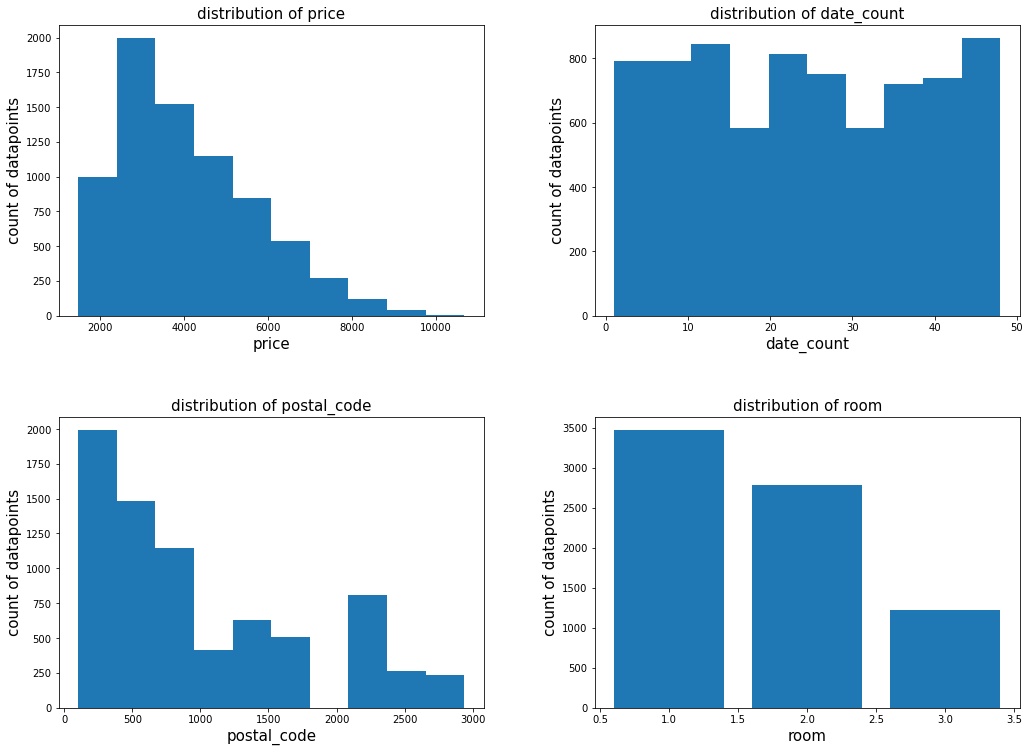

In [4]:
# plot to explore the distribution of features and label

fig, axes = plt.subplots(2, 2, figsize=(16,12))
fig.tight_layout(pad=8) # add some space between the subplots

axes[0][0].hist(y)
axes[0][0].set_title('distribution of price',size=15)
axes[0][0].set_ylabel("count of datapoints",size=15)
axes[0][0].set_xlabel("price",size=15)

axes[0][1].hist(X1)
axes[0][1].set_title('distribution of date_count',size=15)
axes[0][1].set_ylabel("count of datapoints",size=15)
axes[0][1].set_xlabel("date_count",size=15)

axes[1][0].hist(X2)
axes[1][0].set_title('distribution of postal_code',size=15)
axes[1][0].set_ylabel("count of datapoints",size=15)
axes[1][0].set_xlabel("postal_code",size=15)

axes[1][1].bar([1,2,3], df['room'].value_counts())
axes[1][1].set_title('distribution of room',size=15)
axes[1][1].set_ylabel("count of datapoints",size=15)
axes[1][1].set_xlabel("room",size=15)

plt.show()

<AxesSubplot:>

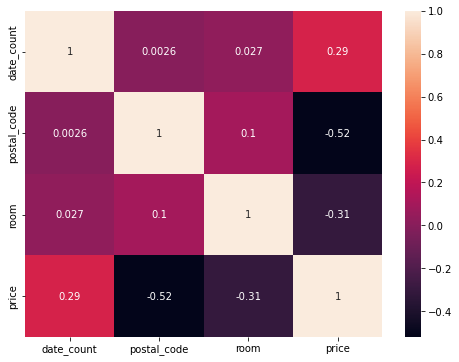

In [5]:
# find the correlation between the features and the label

plt.figure(figsize=(8, 6))
corr_mat = df.corr()
ax = plt.subplot()
sns.heatmap(corr_mat, annot=True, ax=ax)

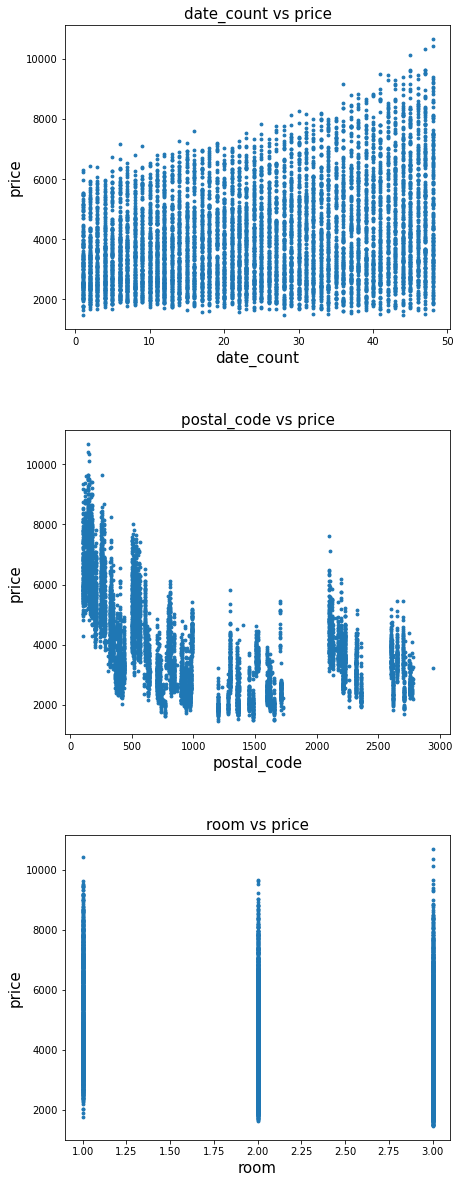

In [6]:
# Visualize the data
# First, create 3 seperate scatter plots to see how each feature relate to the label

fig, axes = plt.subplots(3, figsize=(8, 18)) # create a figure with 3 columns on it
fig.tight_layout(pad=8) # add some space between the subplots
axes[0].scatter(X1, y, s=8) # plot a scatter plot on axes[0] to show the relation between date_count and price
axes[0].set_xlabel("date_count",size=15)
axes[0].set_ylabel("price",size=15)
axes[0].set_title("date_count vs price",size=15)

axes[1].scatter(X2, y, s=8) # plot a scatter plot on axes[1] to show the relation between postal_code and price
axes[1].set_xlabel("postal_code",size=15)
axes[1].set_ylabel("price",size=15)
axes[1].set_title("postal_code vs price",size=15)

axes[2].scatter(X3, y, s=8) # plot a scatter plot on axes[2] to show the relation between room and price
axes[2].set_xlabel("room",size=15)
axes[2].set_ylabel("price",size=15)
axes[2].set_title("room vs price",size=15)

plt.show()

<IPython.core.display.Javascript object>


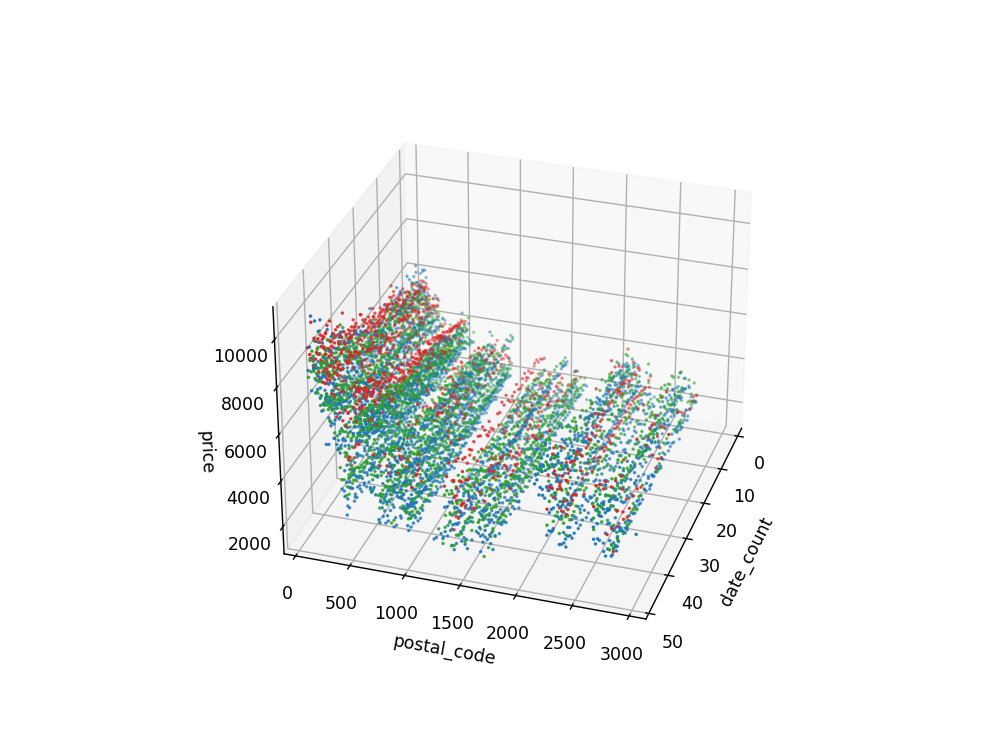

In [7]:
# enable interactivity with 3D graph
%matplotlib notebook

# Next, we want to see how these 3 features together relate to the label
# Here, I visualize using a 3d graph
# x,y-axes are date_count and postal_code
# z-axis is the price
# The datapoints are colored by their number of rooms

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

# create the colormap for the 3 types of flat
# we will have: 1 room - red
#               2 rooms - green
#               3 rooms - blue
colormap = np.array(['tab:red', 'tab:green', 'tab:blue'])
color_category = (df["room"] - 1).to_numpy()

ax.scatter(X1, X2, y, s=1, c=colormap[color_category])
ax.set_xlabel('date_count')
ax.set_ylabel('postal_code')
ax.set_zlabel('price')

def animate(frame):
  ax.view_init(30, frame/4)
  plt.pause(.001)
  return fig

anim = animation.FuncAnimation(fig, animate, frames=200, interval=20)

In [8]:
writergif = animation.PillowWriter(fps=30) 
anim.save("visualizer.gif", writer=writergif)